In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy import spatial
from sklearn.manifold import TSNE
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
import nltk

In [2]:
data = pd.read_excel("Opportunity Dataset.xlsx")

In [3]:
data.head()

,ID,Headline,Description,Funding,Deadline,Type of opportunity,Sub tags,Discipline,Minimum Qualification / Applicable for,Countries eligible,Location of opportunity
0,1,International Fellowship World Forestry Center,WFC’s Discovery Museum was opened in 1971 to e...,NaN,2019-10-15 00:00:00,Conferences,NaN,Humanities and Social Sciences,Bachelors,All,USA
1,2,City of Dreams Pavilion 2020: Call for Proposals,The current state of the world is such that bo...,NaN,2019-09-15 00:00:00,Conferences,NaN,Engineering and Technology,Masters,All,USA
2,3,Urban Confluence Silicon Valley Competition,The Competition is managed by the San José Lig...,NaN,2019-10-15 00:00:00,Competitions,NaN,Engineering and Technology,All,All,USA
3,4,REDEFINING LEARNING SPACES,The University of Louisiana at Lafayette is ex...,NaN,2019-09-15 00:00:00,Competitions,NaN,Engineering and Technology,All,All,USA
4,5,Mozambique Preschool: Flor da Manhã,This competition gives you the opportunity to ...,NaN,2019-12-01 00:00:00,Competitions,NaN,Engineering and Technology,All,All,Mozambique


In [4]:
input_columns = ["Headline","Description","Type of opportunity"
                 ,"Discipline","Minimum Qualification / Applicable for",
                "Countries eligible","Location of opportunity","Sub tags"]

In [5]:
train = data[input_columns]
train.shape

print(train.shape)
print(type(train))
(train.head())

(5500, 8)
<class 'pandas.core.frame.DataFrame'>


,Headline,Description,Type of opportunity,Discipline,Minimum Qualification / Applicable for,Countries eligible,Location of opportunity,Sub tags
0,International Fellowship World Forestry Center,WFC’s Discovery Museum was opened in 1971 to e...,Conferences,Humanities and Social Sciences,Bachelors,All,USA,NaN
1,City of Dreams Pavilion 2020: Call for Proposals,The current state of the world is such that bo...,Conferences,Engineering and Technology,Masters,All,USA,NaN
2,Urban Confluence Silicon Valley Competition,The Competition is managed by the San José Lig...,Competitions,Engineering and Technology,All,All,USA,NaN
3,REDEFINING LEARNING SPACES,The University of Louisiana at Lafayette is ex...,Competitions,Engineering and Technology,All,All,USA,NaN
4,Mozambique Preschool: Flor da Manhã,This competition gives you the opportunity to ...,Competitions,Engineering and Technology,All,All,Mozambique,NaN


In [6]:
embeddings_dict = {}
with open("glove.6B.50d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [7]:
vocabuloryDic = {}
vocabuloryList = []
sentences = []
word_tokens = []
for i in range(train.shape[0]):
    for j in range(7):
        sentences.append(train.iloc[i][j])


In [8]:
for i in sentences:
#     print(i)
    if str(i)!="nan":
        temp = nltk.word_tokenize(i.lower().replace(","," "))
        for j in temp:
#             print(j)
            word_tokens.append(j)

In [9]:
#removing stop words
word_tokens = [w for w in word_tokens if not w in stop_words] 

In [10]:
# (word_tokens)

In [11]:
for i in word_tokens:
    try:
        vocabuloryDic[i]=embeddings_dict[i]
        vocabuloryList.append(i)
    except:
        pass

In [12]:
len(vocabuloryDic)

12755

In [13]:
# vocabuloryList

In [14]:
X = (list(vocabuloryDic.values()))
Y = (list(vocabuloryDic.keys()))

In [15]:
model = KMeans(n_clusters=10, init='k-means++', max_iter=500, n_init=15)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=10, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
# clustering

pred = model.labels_
for i in range(int(len(pred))):
    print(Y[i],pred[i])


international 3
fellowship 9
world 0
forestry 3
center 0
wfc 1
’ 9
discovery 5
museum 9
opened 0
1971 2
educate 6
general 3
public 3
local 0
global 3
forests 5
sustainable 6
. 0
magness 1
memorial 2
tree 5
farm 0
premier 4
demonstration 0
forest 4
located 4
near 0
sherwood 2
oregon 2
offers 3
hands-on 8
outdoor 9
approach 6
environmental 3
learning 6
conferences 9
humanities 9
social 6
sciences 9
bachelors 8
usa 2
city 0
dreams 0
pavilion 9
2020 7
: 0
call 0
proposals 3
current 3
state 3
economic 3
natural 5
resources 3
limited 3
unequally 8
distributed 9
new 0
way 0
thinking 0
necessary 3
solve 6
problems 0
faces 0
inevitably 6
result 0
change 0
basic 3
practices 3
driven 0
one 0
place 0
start 0
activate 5
energize 6
changes 0
within 0
architecture 9
design 5
community 3
movement 0
toward 0
climate 6
action 0
encouraged 3
use 5
energy 5
standards 3
lead 0
future 0
carbon 5
neutral 3
built 0
environment 6
engineering 3
technology 5
masters 9
urban 0
confluence 5
silicon 5
valley 4
comp

camelback 1
entrepreneurs 3
six-month 8
supports 3
founder 2
venture 3
since 0
2015 7
60 7
color 5
women 0
forbes 2
30 7
received 3
echoing 6
green 0
richards 2
draper 2
kaplan 2
collectively 3
gone 0
raise 3
$ 7
26 7
million 7
tracks 9
2 7
conscious 6
tech 0
formerly 2
known 0
good 0
jobs 3
pathways 5
track 0
tailors 8
curriculum 9
individual 3
fellow 2
operate 3
nationally 9
concurrently 7
; 0
orleans 2
features 9
tailored 5
businesses 3
dissertation 9
american 0
designated 3
graduate 2
stage 0
phd 2
ten 7
available 5
non-renewable 8
one-year 3
term 3
beginning 0
june 7
residence 4
abroad 3
another 0
appropriate 3
defray 8
tuition 3
costs 3
grant 3
post 0
doctorate 2
co-creation 8
hub 4
nigerians 4
3-month 8
paid 3
immersive 8
relevant 3
first-hand 6
expertise 3
nigeria 4
nvidia 1
worldwide 3
doctoral 9
artificial 5
intelligence 3
machine 5
autonomous 4
vehicles 5
? 0
19th 9
seeking 3
outstanding 9
mentors 8
technical 3
biggest 0
believed 0
talent 9
beneficial 6
continued 0
success 0

grantees 8
humor 9
english 9
exceed 7
prizes 9
filter 5
sponsored 3
kenko 1
co. 2
ltd. 2
expanding 3
prix 7
excellent 9
worth 7
plough 1
1st 7
asociación 1
nacional 4
caballos 1
pura 1
raza 4
española 1
purebred 8
spanish 4
horse 0
aged 7
runners-up 7
applied 3
ceramics 9
bookbinding 8
jewellery 9
metal 5
furniture 9
leather 5
textiles 5
glass 5
wood 5
commonwealth 4
exceptions 3
write 9
bengali 9
chinese 0
french 0
greek 4
kiswahili 1
malay 4
portuguese 4
samoan 4
tamil 4
turkish 4
minimum 3
kitts 4
vincent 2
painting 9
sculpture 9
installation 5
etc. 5
competiton 8
artist 9
pbs 9
pamphlet 9
nationality 3
silent 0
illustrators 9
edizioni 1
hamdan 2
bin 0
mohammed 4
rashid 4
al 0
maktoum 4
450 7
120 7
uae 4
british 0
ashoka 1
entrepreneurship 6
nairobi 4
kenya 4
exhibit 9
inspiration 9
2-day 8
pass 0
5th 7
accelerate 3
pressing 3
+ 7
connecting 5
ecosystem 5
stakeholders 3
inaugural 9
borderless 8
cross 0
continental 4
18-30 8
boundaries 6
virtual 5
presented 9
thailand 4
office 3
drug

output 5
sweden 4
icann 1
cancun 4
underserved 8
underrepresented 8
active 0
exposed 5
workings 6
assigned 3
7-12 7
cancún 1
storytellers 9
burkina 4
faso 4
ivory 4
detailing 9
embraced 6
demonstrable 6
possess 5
determination 6
telling 0
storytelling 9
abilities 6
ea 1
package 3
exponentially 5
sectors 3
pilot 0
sanitation 3
burundi 4
comoros 4
djibouti 4
eritrea 4
seychelles 4
somalia 4
sudan 4
geographic 5
component 5
fulbright 2
accept 3
undertake 3
in-depth 9
examination 3
enhancement 6
utilizing 5
speaking 0
maps 5
illustrations 9
obuchi 6
imaginative 6
impetus 6
deserving 6
ldcs 8
sids 1
eager 0
listed 7
leap 5
run 0
deserves 6
recognition 3
sipa 1
yearly 7
equips 8
requisite 6
period 0
till 7
cycle 5
outlined 3
empowerment 6
law 3
physical 6
culminate 8
rewarded 6
showcased 9
villa 2
dissertations 8
collections 9
weekly 9
intellectual 6
queen 2
mary 2
chevening 8
uk 3
cohort 8
1500 7
addition 3
standard 5
msc 1
eric 2
groningen 1
ebf 1
handed 0
seventy 7
follow 0
contacts 3
lac

onassis 2
athens 4
riga 4
emap 1
in-house 9
accc 1
gutiérrez 1
abascal 1
rambla 1
catalunya 1
barcelona 4
competitiveness 6
freelance 9
suggests 0
isolated 0
succeed 0
usaid 3
internews 1
releasing 0
slated 7
31 7
skopje 4
macedonia 4
technologists 8
localized 5
balkan 4
serbia 4
montenegro 4
kosovo 4
ireland 4
liechtenstein 4
registration 3
slots 5
reykjavík 1
keen 6
norm 2
authors 9
longlisted 8
twenty 7
goldsmiths 1
desmond 2
elliott 2
jan 2
michalski 1
folio 9
geoffrey 2
faber 1
connor 2
1991 7
somme 4
spot 0
migratory 5
routes 5
birds 5
remains 0
unmissable 8
lovers 9
guided 5
walks 0
vast 0
merit 3
highest 7
selection 9
intending 3
ordinary 0
studied 2
highlighting 6
illustrating 9
despair 6
hate 6
compassion 6
failures 6
victories 7
personally 0
citizen 3
cisco 5
lift 0
talking 0
proposed 3
voice-overs 8
sound 0
localization 8
performs 9
languages 9
genealogical 9
appropriately 6
genealogy 9
h 7
circular 5
gets 0
embark 3
aftermath 0
facts 6
ingredients 5
drama 9
floods 4
fires 

craig 2
newmark 1
began 0
dozen 0
veteran 2
wege 1
ignites 8
college/university 8
contend 3
three-day 8
comprise 7
reimagining 8
defender 2
defenders 0
44th 7
lobbying 3
effect 0
thomson 2
losing 0
signing 3
agreement 3
westerwelle 1
scene 0
10-14 7
litigation 3
zanzibar 4
lawyers 3
placement 3
arusha 4
4.5 7
interning 8
handles 5
lumix 1
hanover 2
verein 1
zur 1
förderung 1
medien 1
e.v. 1
connection 0
directed 2
journalistic 6
visuals 9
reaches 7
showbiz 9
fast 0
accurate 5
emirates 4
correspondent 2
journalist 2
perform 0
dcms 1
1:1 8
masterclasses 8
thriving 6
peer-to-peer 8
si 1
inspirational 9
pretoria 4
stiftung 1
intention 3
newsgathering 8
five-week 8
ewen 1
macaskill 1
changers 8
combining 5
17-22 1
witnessing 6
trend 0
decoupled 8
reverse 0
situation 0
20-22 7
corners 5
diving 5
trademark 9
legend 9
introvert 8
extrovert 8
elp 1
transforms 5
award-winning 9
haas 2
mo 2
ibrahim 4
soas 1
ending 0
oceans 5
powered 5
finds 0
sdg 1
awaiting 3
dell 7
shine 9
ride 0
iot 8
hurry 0
e

defined 5
undercurrents 6
wanted 0
brushing 6
nomads 4
\ 7
anson 2
visited 4
door 0
grain 5
educated 2
daughters 2
meltwater 8
mest 1
graduate-level 8
internationally-recognized 8
culminates 8
booster 5
corporates 8
7.8 7
cumberland 2
lodge 2
belief 6
high-potential 8
retreats 8
forb 8
seekers 4
creators 9
peniel 1
pmp 1
mentees 8
blended 5
stems 5
confirm 0
documents 3
2-years 8
rankings 7
sixth 7
starred 2
renovations 3
rapprochement 6
accurately 6
reveal 0
representations 6
gastronomy 8
crises 6
labor 3
hundred 7
forty 7
committees 3
chaired 2
jean-noël 1
jeanneney 1
choses 1
prize-winners 8
unanswered 0
installments 7
version 9
contestants 9
placing 0
documentary-style 8
exhibited 9
louisville 2
kentucky 2
annum 7
non-eu 8
valuing 8
formation 5
helena 2
tristan 1
cunha 1
ascension 4
gibraltar 4
falkland 4
anguilla 1
bermuda 4
virgin 4
cayman 4
montserrat 4
turks 4
caicos 4
buffalo 2
postsecondary 8
holistic 6
click 5
possibility 0
doshisha 1
governed 4
thirteen 7
appeal 0
preferabl

ics 8
multidimensional 8
legitimacy 6
multilevel 8
separation 6
advantages 6
abolish 3
aston 2
professions 6
researches 8
cmes 8
levant 1
1352 1
lifetimes 8
epidemics 6
ass 1
einar 1
temporalities 8
preconditions 6
human-animal 8
cscc 1
collegio 1
carlo 2
alberto 2
affiliates 3
demography 6
rtg 1
newcastle 2
totally 0
compact 5
arc 5
ernst 2
mach 7
fachhochschule 8
ahmanson 1
ucla 2
holdings 3
printed 9
aldine 1
elmer 2
orsini 1
bourbon 2
monte 2
faustino 1
rouse 2
hawaiʻi 1
uh 1
cwu 1
heyman 1
samuel 2
ronnie 2
begun 0
kennedy 2
served 2
attorney 2
connecticut 2
tianjin 4
dioscuri 1
mpg 7
ncn 1
polish 4
wmg 1
vector 5
ontario 2
bennett 2
lse 1
1968 2
enriches 8
fernandes 4
possibly 0
collegium 1
revolves 9
predicaments 8
oort 1
sme 8
fostered 6
ias 1
rolling 0
mile 7
wti 1
texts 9
nastaliq 8
seals 5
stamps 9
terminology 6
abbreviations 8
mother 0
jones 2
pretty 0
lose 0
operated 5
trying 0
hacks 8
caution 6
volatile 4
earthquakes 5
hurricanes 7
tsunamis 4
advocating 6
wiki 8
wlm 1
wik

formula 5
continually 6
dollar 7
92 7
thyme 5
hull 2
teesside 1
greener 6
assets 3
boosting 3
humber 1
estuary 4
tees 1
lignocellulosic 8
wastes 5
woods 0
barley 5
straw 0
enzymatic 8
hydrolysis 5
breakdown 6
biomass 5
sugars 5
bioethanol 8
skövde 1
administrates 1
uhr 1
waivers 3
invoice 8
diabetes 6
co-financed 1
dda 1
postdocs 8
cimi 1
informatique 1
toulouse 4
incumbent 2
0.5 7
cognate 1
p-adic 8
symmetry 5
complexes 5
calculate 5
illustrate 6
e-learning 8
inter-university 8
ects 8
imt 1
recherche 1
en 4
irit 1
roc 4
mac 2
tsf 1
laboratoire 1
d'analyse 1
d'architecture 1
systèmes 1
laas 1
examined 3
seeger 2
hellenic 4
hannah 2
o'boyle 1
groundwater 5
gaps 6
intakes 5
reception 9
prehistory 9
sei 1
urbanisation 8
insistence 6
inherently 6
understandings 6
seriously 0
geophysical 1
climatic 6
unsettling 6
poetics 1
rooted 6
anti-racist 8
diem 1
desk 9
linguistically 6
aboriginal 4
torres 2
strait 4
yvr 1
yukon 4
older 0
carving 9
zi 1
loeb 2
club 0
münchen 1
commemorates 9
1867 2
in

alma 2
mater 2
dear 2
replicable 8
precautionary 3
subset 5
warning 0
hydropower 5
deep-sea 8
altogether 3
post-master 8
190 7
zhejiang 4
preset 5
anso 1
cas 1
36 7
cultivation 5
subject-specific 8
sex 0
marital 6
familial 6
classed 5
payer 1
icwa 1
self-designed 8
13-15 7
communicative 6
shrinking 6
clubs 0
strasbourg 4
babson 2
kirkland 2
parliamentarians 4
qualitatively 8
quantitatively 8
static 5
sze 1
lim 2
macquarie 2
cole 2
taxes 3
payroll 3
percentages 7
lesser 0
anhalt 1
hsa 1
ucp 1
gce 1
baccalaureate 8
shaanxi 4
aziz 4
regent 2
yousef 4
jameel 1
'68 1
68 7
1985 2
forget 0
petrochemicals 5
sequestration 8
collegial 8
campus-wide 8
roundtables 8
majesty 9
likewise 6
circumscribed 8
instructors 8
puzzles 9
self-study 8
bottom-up 8
dli 1
unfair 3
contextual 8
helen 2
nissenbaum 1
estrin 1
vitaly 1
summoning 8
guinness 2
broke 0
chairmanship 3
youngsters 0
hearing 0
finals 7
28-29 1
philipines 1
solid-fueled 8
liquid-fueled 8
engines 5
machinery 5
payloads 5
freestyle 7
pitching 

disruptor 8
prolific 9
innovator 8
bookkeeping 8
spreadsheets 8
questionnaires 8
protocols 5
compiling 9
tabulating 8
collects 9
extracting 5
searches 3
academies 9
crg 1
320 7
june/july 1
vouchers 3
lionel 2
cliffe 1
africa-based 8
1/3 7
descent 4
megacity 8
preoccupied 6
gaze 6
54 7
aug 7
imperial 4
hornbill 1
kariba 1
binghamton 1
sunny 0
ml 1
suny 1
hires 2
suncor 1
shaw 2
proceeding 3
kigali 4
q 7
tyne 2
trace 5
surgery 0
merged 2
szent 1
geek 9
rwandans 4
endows 8
osaka 4
heinrich 2
boll 1
cite 6
convincing 6
2.1 7
brink 4
iucn 3
ssc 1
extinctions 8
conserving 6
intact 5
halt 3
english-medium 8


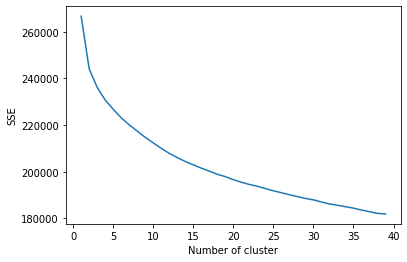

In [17]:
import matplotlib.pyplot as plt
# Sum of Squares errors stored here
sse = {}
for k in range(1, 40):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100).fit(X)
    sse[k] = kmeans.inertia_
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")

plt.savefig('elbow_method_nlp_approach.png')

In [18]:
import csv
with open("Clusters.csv", "w") as csv_file:
        writer = csv.writer(csv_file, delimiter=',')
        for i in range(len(pred)):
            print([Y[i],pred[i]])
            ls = [Y[i],pred[i]]
            writer.writerow(ls)

['international', 3]
['fellowship', 9]
['world', 0]
['forestry', 3]
['center', 0]
['wfc', 1]
['’', 9]
['discovery', 5]
['museum', 9]
['opened', 0]
['1971', 2]
['educate', 6]
['general', 3]
['public', 3]
['local', 0]
['global', 3]
['forests', 5]
['sustainable', 6]
['.', 0]
['magness', 1]
['memorial', 2]
['tree', 5]
['farm', 0]
['premier', 4]
['demonstration', 0]
['forest', 4]
['located', 4]
['near', 0]
['sherwood', 2]
['oregon', 2]
['offers', 3]
['hands-on', 8]
['outdoor', 9]
['approach', 6]
['environmental', 3]
['learning', 6]
['conferences', 9]
['humanities', 9]
['social', 6]
['sciences', 9]
['bachelors', 8]
['usa', 2]
['city', 0]
['dreams', 0]
['pavilion', 9]
['2020', 7]
[':', 0]
['call', 0]
['proposals', 3]
['current', 3]
['state', 3]
['economic', 3]
['natural', 5]
['resources', 3]
['limited', 3]
['unequally', 8]
['distributed', 9]
['new', 0]
['way', 0]
['thinking', 0]
['necessary', 3]
['solve', 6]
['problems', 0]
['faces', 0]
['inevitably', 6]
['result', 0]
['change', 0]
['basic', 

['youths', 0]
['ages', 7]
['long-lasting', 8]
['transition', 3]
['meaningful', 6]
['cost', 3]
['kasher', 1]
['consulting', 3]
['nine', 7]
['9', 7]
['employees', 3]
['volunteered', 2]
['spanned', 9]
['sharing', 3]
['breakout', 9]
['toyota', 7]
['adopt', 3]
['panoramic', 9]
['generations', 6]
['order', 3]
['values', 6]
['fundamentally', 6]
['philosophies', 6]
['difficult', 0]
['transcend', 6]
['nascent', 6]
['manifest', 6]
['warc', 1]
['regions', 4]
['transitional', 3]
['legacy', 6]
['three-year', 3]
['grant-making', 8]
['accra', 4]
['ghana', 4]
['macarthur', 2]
['us-based', 8]
['community-based', 8]
['ngos', 3]
['seven', 7]
['transformative', 6]
['interventions', 6]
['rebuild', 3]
['survivor', 2]
['agency', 3]
['cut', 0]
['necessarily', 6]
['solidarity', 6]
['youth-led', 8]
['peaceful', 6]
['inclusive', 6]
['intercultural', 8]
['interfaith', 6]
['approaches', 6]
['entirely', 0]
['benefit', 3]
['2008', 7]
['responded', 0]
['calls', 0]
['establishing', 3]
['mechanisms', 5]
['63', 7]
['rea

['multivariate', 8]
['prepares', 3]
['modelling', 5]
['assume', 3]
['health-related', 8]
['doctor', 0]
['dba', 1]
['sbs', 1]
['oriented', 5]
['face-to-face', 8]
['assessed', 3]
['completing', 3]
['satisfactory', 6]
['publishable', 8]
['external', 5]
['consequently', 6]
['scope', 6]
['organizational', 6]
['methodologies', 8]
['concerning', 3]
['involving', 3]
['requirements', 3]
['flexibility', 3]
['produces', 5]
['welfare', 3]
['causes', 6]
['transitions', 5]
['accounting', 3]
['frankfurt', 7]
['commencing', 8]
['rerum', 1]
['dr.', 2]
['rer', 1]
['pol', 1]
['aarhus', 1]
['zew', 1]
['mannheim', 1]
['deutsche', 7]
['bundesbank', 3]
['oecd', 3]
['tum', 1]
['santa', 2]
['barbara', 2]
['rostock', 1]
['sydney', 2]
['wu', 2]
['vienna', 4]
['saint', 2]
['minnesota', 2]
['top-level', 8]
['executives', 3]
['afford', 0]
['passions', 6]
['regarded', 0]
['military', 0]
['workplace', 6]
['feel', 0]
['well-prepared', 8]
['interests', 3]
['align', 6]
['szeged', 1]
['previous', 0]
['participated', 3]
[

['traffic', 0]
['intentional', 6]
['unintentional', 6]
['drunk', 0]
['impairments', 6]
['minimizes', 8]
['crash', 0]
['norms', 6]
['enforcement', 3]
['cross-cutting', 8]
['real-life', 9]
['orient', 4]
['cohesive', 6]
['exposes', 6]
['complementary', 5]
['administrative', 3]
['co-ordinate', 8]
['deadlines', 3]
['qualitative', 6]
['skype', 1]
['nominated', 2]
['ucl', 1]
['acceptance', 6]
['onto', 0]
['nominee', 2]
['ctr', 1]
['prospects', 0]
['falling', 0]
['remit', 8]
['reference', 9]
['trophoblast', 8]
['holder', 2]
['bonn', 4]
['detailed', 9]
['geography', 6]
['emergence', 6]
['postdoc', 8]
['viewed', 6]
['anita', 2]
['borg', 1]
['furthering', 6]
['excel', 5]
['ambition', 6]
['yearlong', 3]
['legislation', 3]
['jurisprudence', 6]
['disabilities', 6]
['osf', 1]
['industrialized', 4]
['lisa', 2]
['ellen', 2]
['goldberg', 2]
['h.', 2]
['revson', 1]
['beloved', 9]
['wife', 2]
['john', 2]
['sexton', 2]
['jewish', 0]
['2007', 7]
['philanthropic', 6]
['left', 0]
['fruition', 6]
['embodied', 

['philology', 9]
['alex', 2]
['grateful', 0]
['indebted', 6]
['eugene', 2]
['ran', 0]
['2001-2002', 1]
['nauk', 1]
['trinity', 2]
['intends', 3]
['elect', 3]
['regards', 6]
['comparable', 5]
['remuneration', 3]
['retirement', 3]
['satisfied', 0]
['particulars', 6]
['emoluments', 8]
['administrator', 2]
['periodic', 5]
['sign', 0]
['project-based', 8]
['animal', 5]
['furtherance', 8]
['samples', 5]
['describes', 9]
['arrange', 3]
['emailed', 1]
['ut', 1]
['precedents', 6]
['marsha', 2]
['description', 9]
['stipends', 8]
['austin', 2]
['salaries', 3]
['47', 7]
['476', 7]
['preceding', 7]
['elizabeth', 2]
['two-years', 8]
['life-changing', 8]
['2:1', 8]
['linköping', 1]
['liu', 2]
['menu', 9]
['nhh', 1]
['norwegian', 4]
['vacancies', 3]
['females', 7]
['banks', 3]
['computers', 5]
['fairness', 6]
['rationality', 6]
['cbe', 2]
['chalmers', 2]
['143', 7]
['waiver', 3]
['relative', 6]
['weighted', 7]
['lists', 9]
['ubs', 2]
['furthermore', 6]
['chf', 1]
['42', 7]
['grounds', 3]
['pre-conditi

['convened', 3]
['alexandra', 2]
['scheele', 1]
['roth', 2]
['heidemarie', 1]
['winkel', 1]
['kavli', 1]
['caltech', 1]
['kni', 1]
['supporter', 2]
['10-week', 8]
['closest', 0]
['uhuru', 1]
['kenyatta', 2]
['22-28', 7]
['afs', 1]
['southwest', 4]
['sxsw', 9]
['convergence', 6]
['vr', 1]
['augmented', 5]
['mr', 2]
['passes', 0]
['demos', 9]
['third-party', 5]
['off-grid', 8]
['limiting', 3]
['cmi', 1]
['jordon', 1]
['german-italian', 8]
['shapes', 5]
['fabian', 1]
['ja', 1]
['jaakko', 1]
['dove', 9]
['self-esteem', 6]
['uk-wide', 8]
['awareness-raising', 8]
['salon', 9]
['meetup', 8]
['nef', 1]
['commercializing', 8]
['nonexistent', 6]
['od', 1]
['projecting', 5]
['vantage', 5]
['billions', 3]
['sci', 9]
['2600', 1]
['npr', 9]
['kroc', 2]
['philanthropist', 2]
['joan', 2]
['stations', 0]
['sewa', 1]
['35-50', 8]
['cbos', 1]
['grass-root', 8]
['amends', 6]
['amman', 4]
["d'lvoire", 1]
['38th', 7]
['39th', 7]
['unv', 1]
['diagrams', 5]
['infographics', 8]
['toolkit', 8]
['well-researched